# Worked Example: 2D histograms, 1D histograms, and subplots

Let's bring together what we've learned so far in terms of 1D histograms, 2D histograms, and using subplots to create the following plot showing the two-dimensional histogram of the data and each of the corresponding one-dimensional histograms:

![Two dimensional histogram with one dimensional marginals](img/5.1-2dhist-with-marginals-example.png)

# Explore our data through a scatter plot

Let's start by gathering our data. In this case, we'll make some sample data below from three multivariate normal distributions. Don't worry if this isn't clear (it's not necessary for this course but makes the data more interesting to visualize):

In [53]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

sizes = [50000, 25000, 20000]
means = [[2,2],[-3,-1],[0,-3]]
covs = [[[1, 0.8],[0.8,1]], [[1, -0.4],[-0.4,1]], [[-0.2, -1],[0,-0.2]]]

samples = []
for size, mean, cov in zip(sizes, means, covs):
    samples.append(np.random.multivariate_normal(mean, cov, size=size))

data = np.concatenate((samples[0],samples[1],samples[2]))
data

/var/folders/m6/8k94r84d6qq_67mq2lnhvrzh0000gn/T/ipykernel_61042/911188102.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples.append(np.random.multivariate_normal(mean, cov, size=size))


array([[-0.86988382,  0.32008646],
       [ 1.24285803,  1.37895148],
       [ 0.93968101,  2.1011349 ],
       ...,
       [-0.54731583, -3.53003648],
       [ 0.19794066, -4.09599602],
       [-0.35396352, -4.13868164]])

In [54]:
data.shape

(95000, 2)

Here we see that we have 95,000 samples in our data, each of which have two dimensions so each has two variables associated with it. Let's begin by scatter plotting a random sample of 1,000 points so we can see it clearly. We'll use the `numpy.random.choice()` function to randomly sample the 1,000 points to visualize. First we'll use that function to select random indices then apply them to our `data` matrix

In [55]:
sample_indices = np.random.choice(data.shape[0], size=1000, replace=False)
sample = data[sample_indices]
sample.shape

(1000, 2)

Now we'll make our scatter plot of the data:

Text(0, 0.5, 'Variable 2')

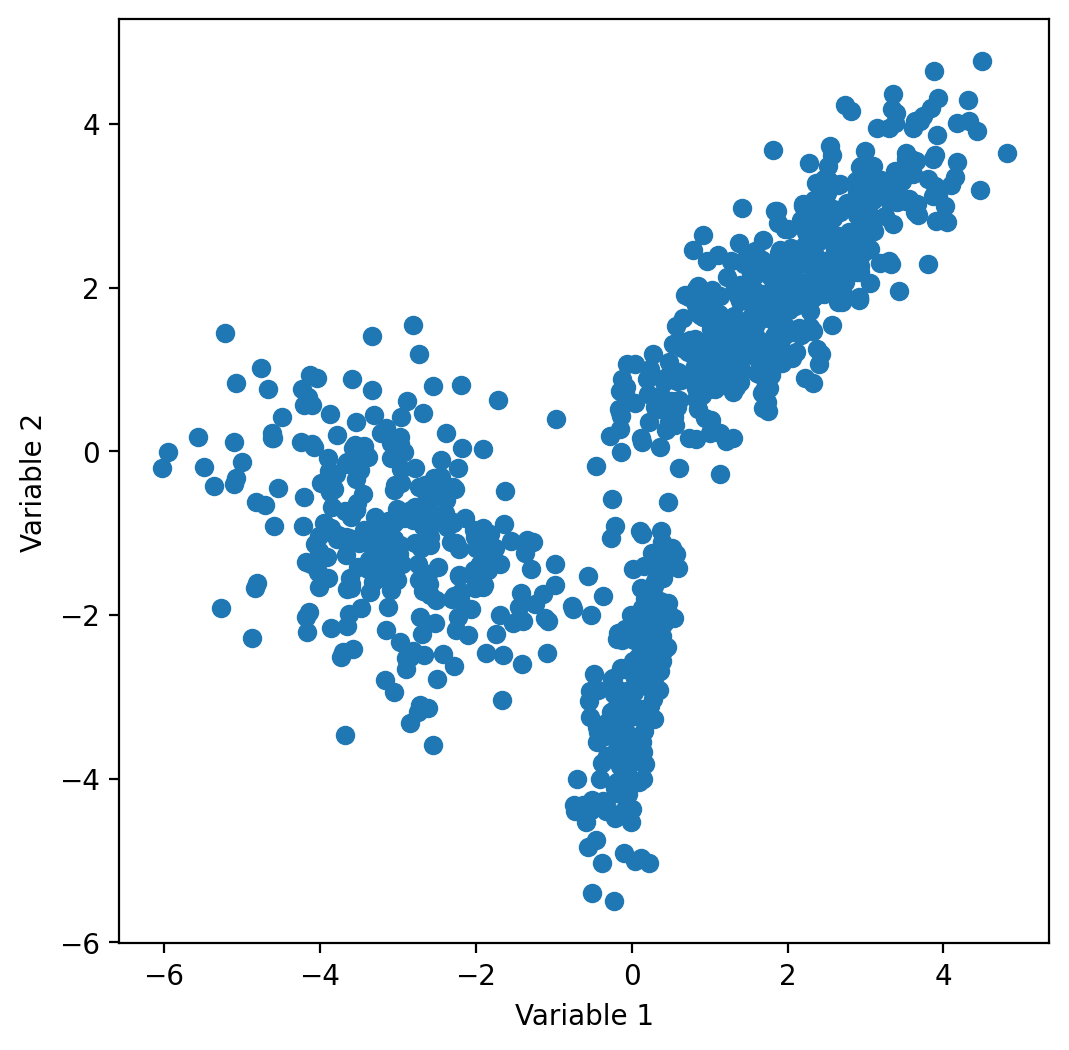

In [56]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(sample[:,0], sample[:,1])
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

This is pretty much unreadable because the markers overlap one another. Let's make the marker semitransparent using the alpha property and also make the marker size smaller:

Text(0, 0.5, 'Variable 2')

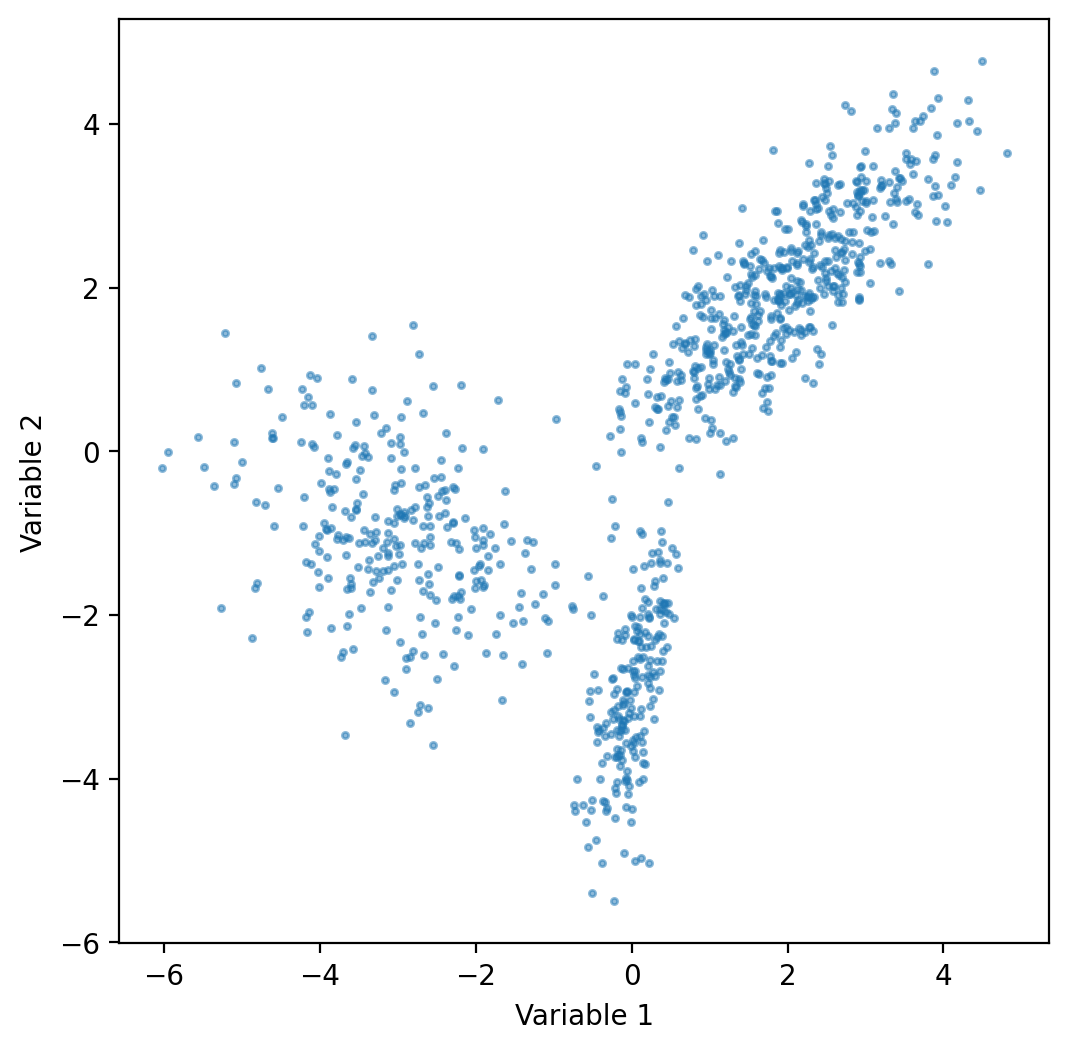

In [57]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(sample[:,0], sample[:,1], alpha = 0.5, s=5) # markersize in a scatter plot is set by `s`
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

This is not even showing 10% of the data and already there are a lot of overlapping markers in this plot. A two-dimensional histogram will help us to visualize how all of our 95,000 samples are distributed. 

## Create our 2D histogram

Let's create our 2D histogram of our data and add a color bar to it, as in the previous example, using what we've learned.

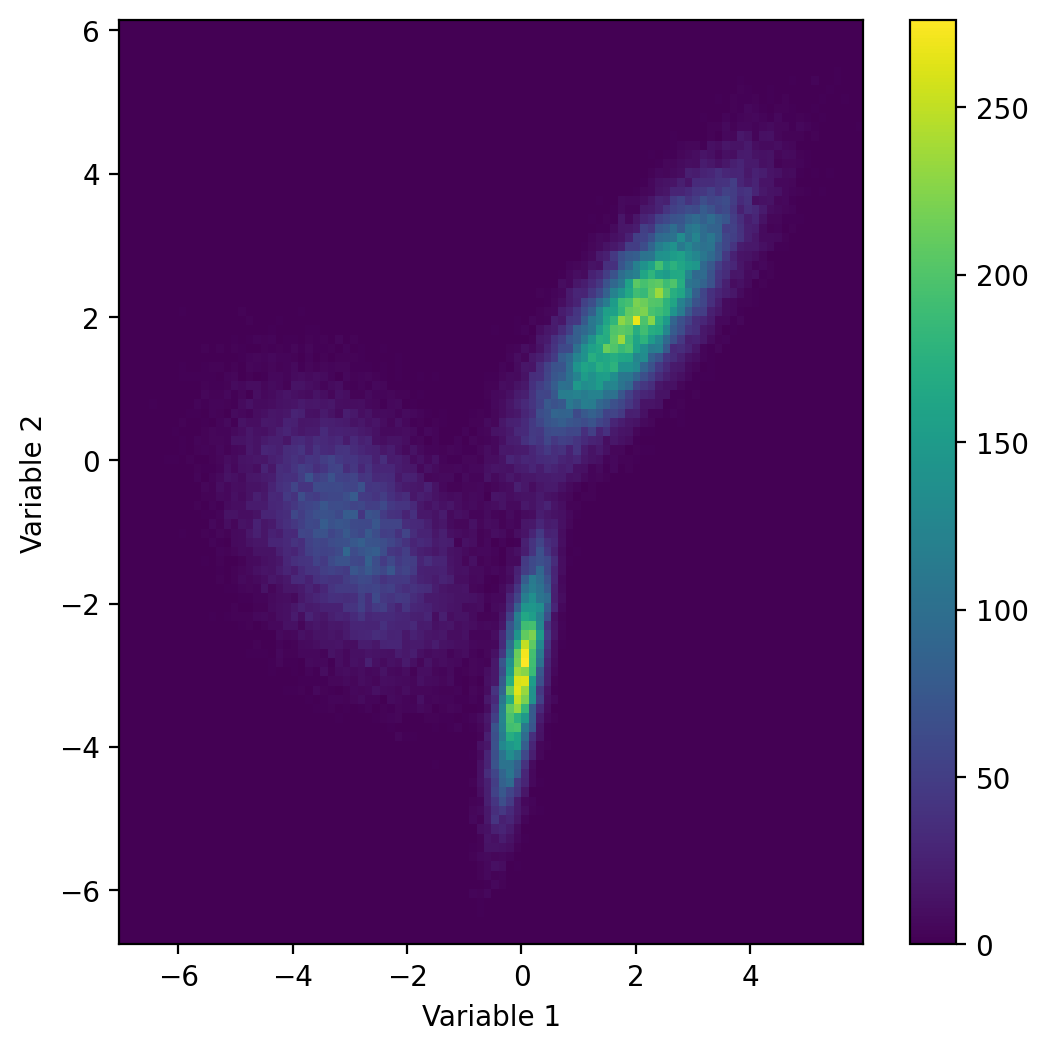

In [58]:
fig, ax = plt.subplots(figsize=(6,6))
counts, xedges, yedges, im = ax.hist2d(data[:,0],data[:,1], bins=100)
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

fig.colorbar(im, ax=ax)

This is great - this very clearly shows us that we have three cluster to our data of varying compactness. The leftmost cluster has the fewest samples overall, while the other two are closer in size.

One thing to note here, we have the labels on the color axis, but the speicif number of samples counted in each bin may not be meaningful to most who are looking at this plot. We can simply relabel the color axis to say that the bottom color represents no samples and the top represents many samples in a bin. We can do this by setting the y ticks and the y tick labels properties of the colorbar axis.

[Text(1, 0.0, '0'), Text(1, 276.0, 'Lots!')]

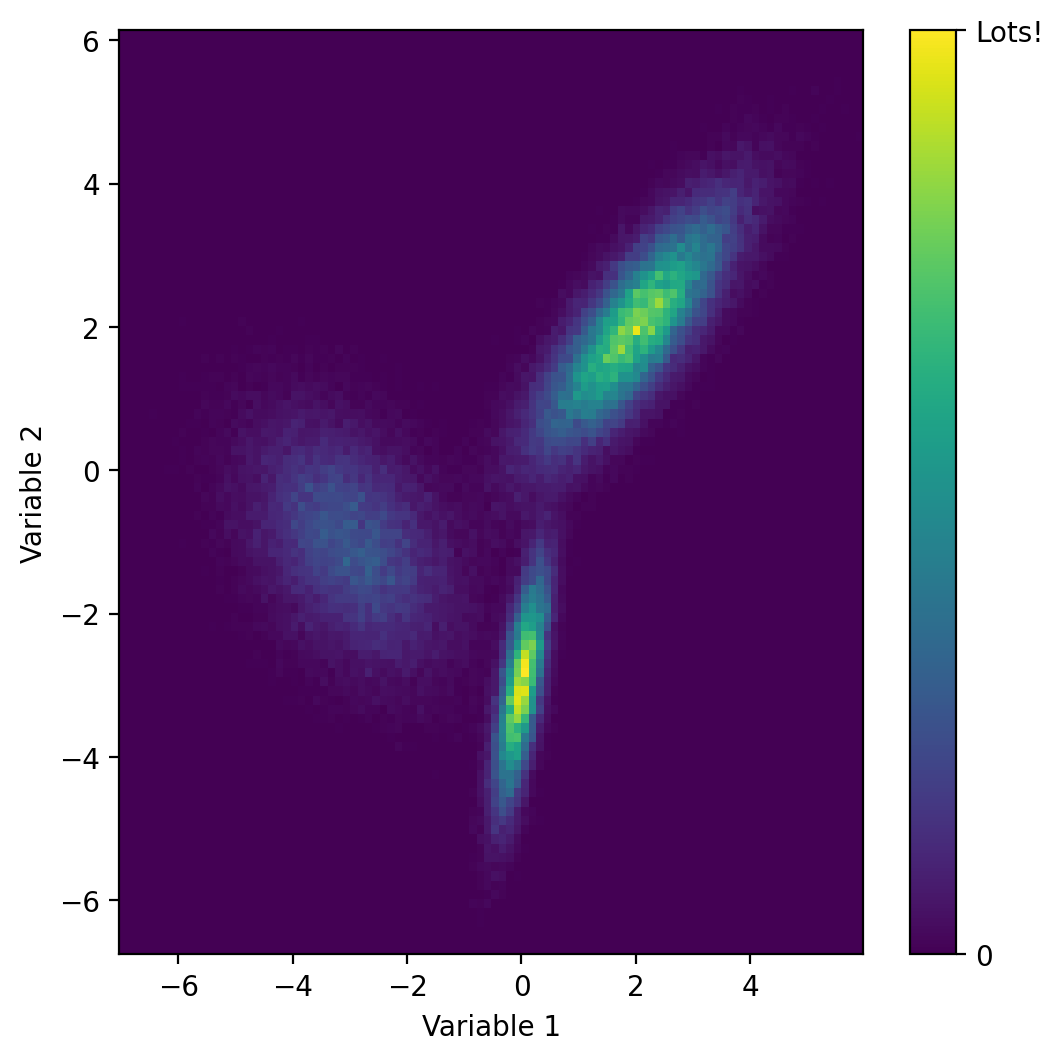

In [59]:
fig, ax = plt.subplots(figsize=(6,6))
counts, xedges, yedges, im = ax.hist2d(data[:,0],data[:,1], bins=100)
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

cbar = fig.colorbar(im, ax=ax)
# cbar = plt.colorbar(im,ticks=[counts.min(),counts.max()])
cbar.ax.set_yticks([counts.min(),counts.max()])
cbar.ax.set_yticklabels(['0', 'Lots!']) 

## Adding in 1D histograms

Now that we have the data above, it's sometimes beneficial to also see the one-dimensional histograms of each individual variable, in addition to the joint, two-dimensional histogram as shown above. Let's create a histogram that shows each of these in its own subplot:

Text(0, 0.5, 'Counts')

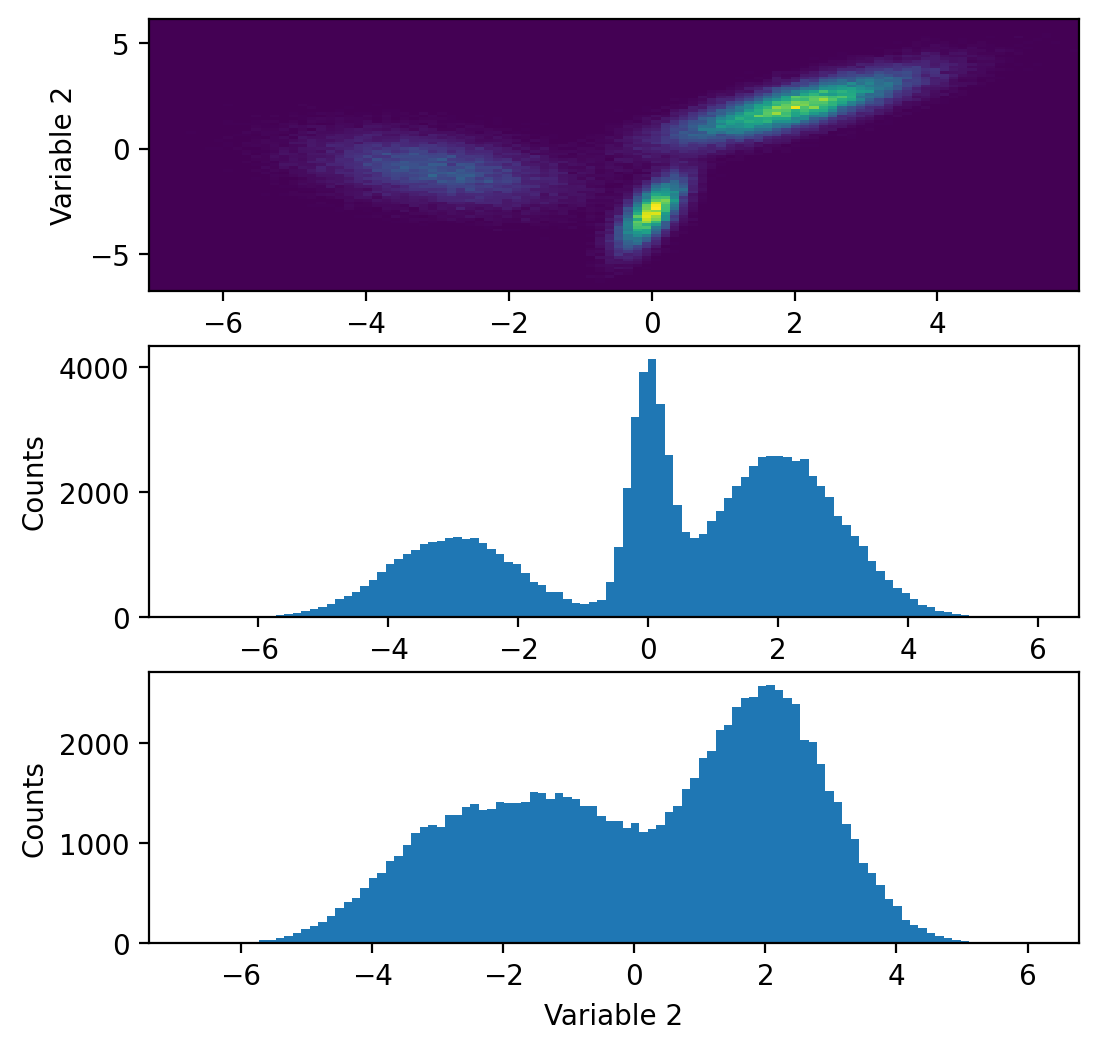

In [60]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(6,6))

# Create the 2D histogram
ax1.hist2d(data[:,0],data[:,1], bins=100)
ax1.set_xlabel('Variable 1')
ax1.set_ylabel('Variable 2')

# Create the 1D histogram of variable 1
ax2.hist(data[:,0],bins=100)
ax2.set_xlabel('Variable 1')
ax2.set_ylabel('Counts')

# Create the 1D histogram of variable 2
ax3.hist(data[:,1],bins=100)
ax3.set_xlabel('Variable 2')
ax3.set_ylabel('Counts')

## Making this easier to read and more professional

One thing that's challenging here in reading this plot is that the y-axis of the 2D histogram corresponds to variable 2 and that's the same as the x-axis of the 1D histogram plot of variable 2. It would be nice if the 1D histogram plot could be rotated by 90 degrees and placed adjacent to the axis to help compare the data in the 2D histogram to that in the 1D histograms. We can use matplotlib to do this and show our two-dimensional histogram along with the one-dimensional histogram of each of the individual variables along the shared axis.

As we discussed before, you can do highly customized plotting with matplotlib, even though it may take a bit more code to get there. One example of this is creating custom combinations of subplots.  

In this case, we can start this process by setting up our axes to have a large area for the 2D histogram and smaller regions for the one-dimensional histograms along shared axes. Let's do it:

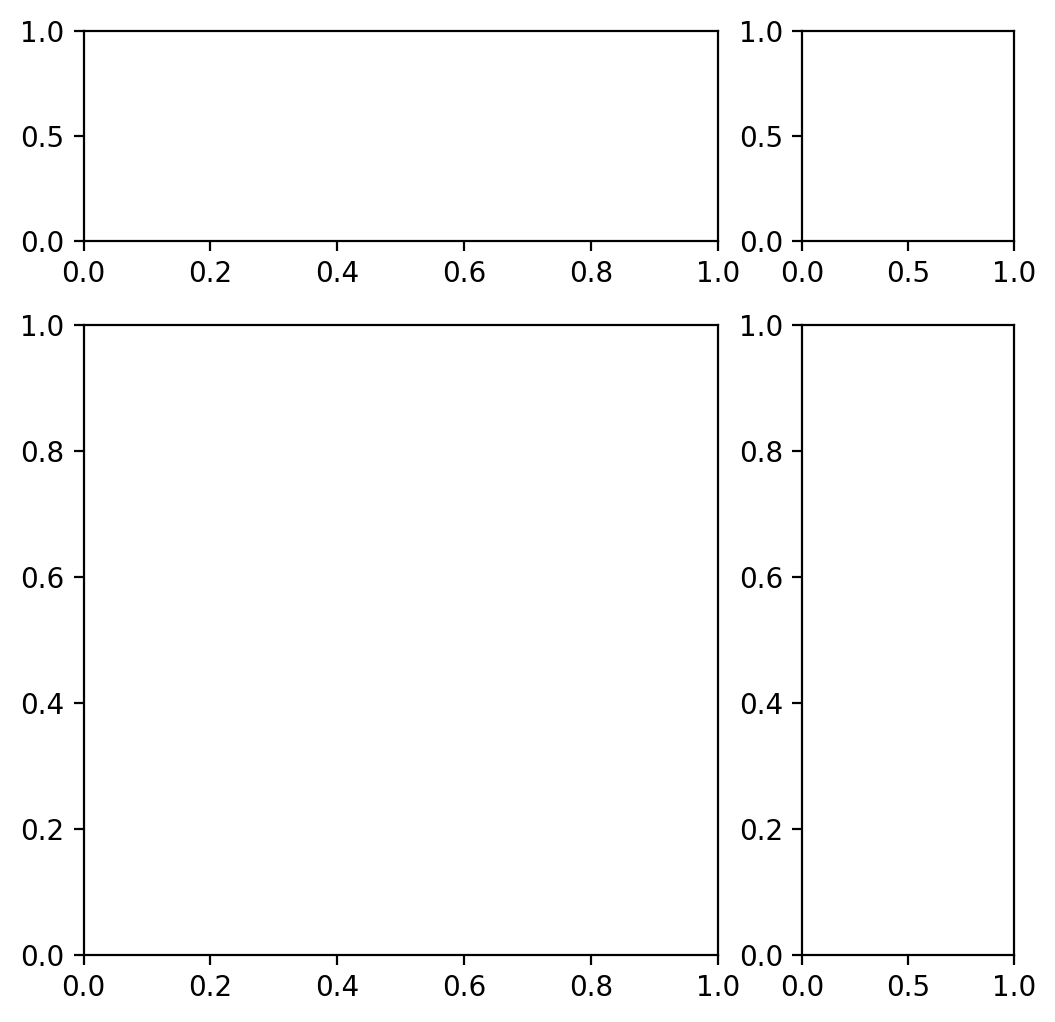

In [61]:
fig,ax=plt.subplots(2,2,
                    figsize=(6,6),
                    width_ratios=[0.75,0.25], # Makes the axis for the 2D histogram claim 75% of the width of the plot
                    height_ratios=[0.25,0.75]) # Makes the axis for the 2D histogram claim 75% of the height of the plot

Now, we just need to add the plots to each of the axes that we just created.

(0.0, 1.0, 0.0, 1.0)

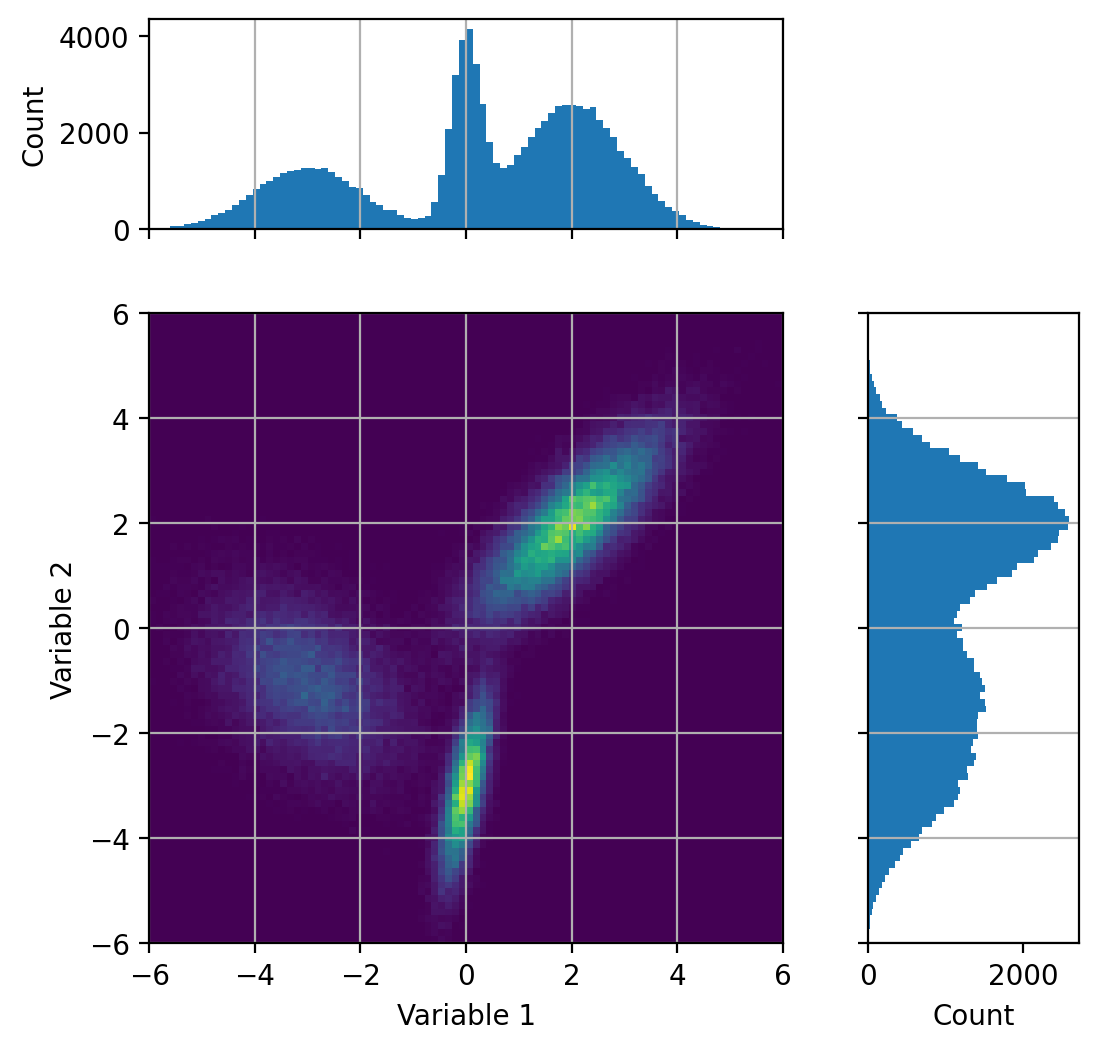

In [63]:
fig,[[ax1,ax_none],[ax2D,ax2]]=plt.subplots(2,2,
                    figsize=(6,6),
                    width_ratios=[0.75,0.25],
                    height_ratios=[0.25,0.75])

limits = [-6,6]

# 2D histogram axis
ax2D.hist2d(data[:,0],data[:,1], bins=100)
ax2D.set_xlabel('Variable 1')
ax2D.set_ylabel('Variable 2')
ax2D.set_xlim(limits)
ax2D.set_ylim(limits)
ax2D.grid(visible=True)

# 1D Variable 1 hist
ax1.hist(data[:,0],bins=100)
ax1.set_xlim(limits)
ax1.set_ylabel('Count')
ax1.set_xticklabels([])
ax1.grid(visible=True, axis='x')

# 1D Variable 2 hist (which needs to be rotated 90 degrees)
ax2.hist(data[:,1],bins=100,orientation='horizontal') # `orientation` allows us to rotate the axis
ax2.set_ylim(limits)
ax2.set_xlabel('Count')
ax2.set_yticklabels([])
ax2.grid(visible=True, axis='y')

# The upper right plot will be left blank, so we can turn it off
ax_none.axis('off')

Last but not least, there is too much space between the 1D and 2D histograms, let's reduce that by using the `fig.subplots_adjust(hspace=0.05, wspace=0.05)` command which sets the horizontal and vertical space between subplots.

(0.0, 1.0, 0.0, 1.0)

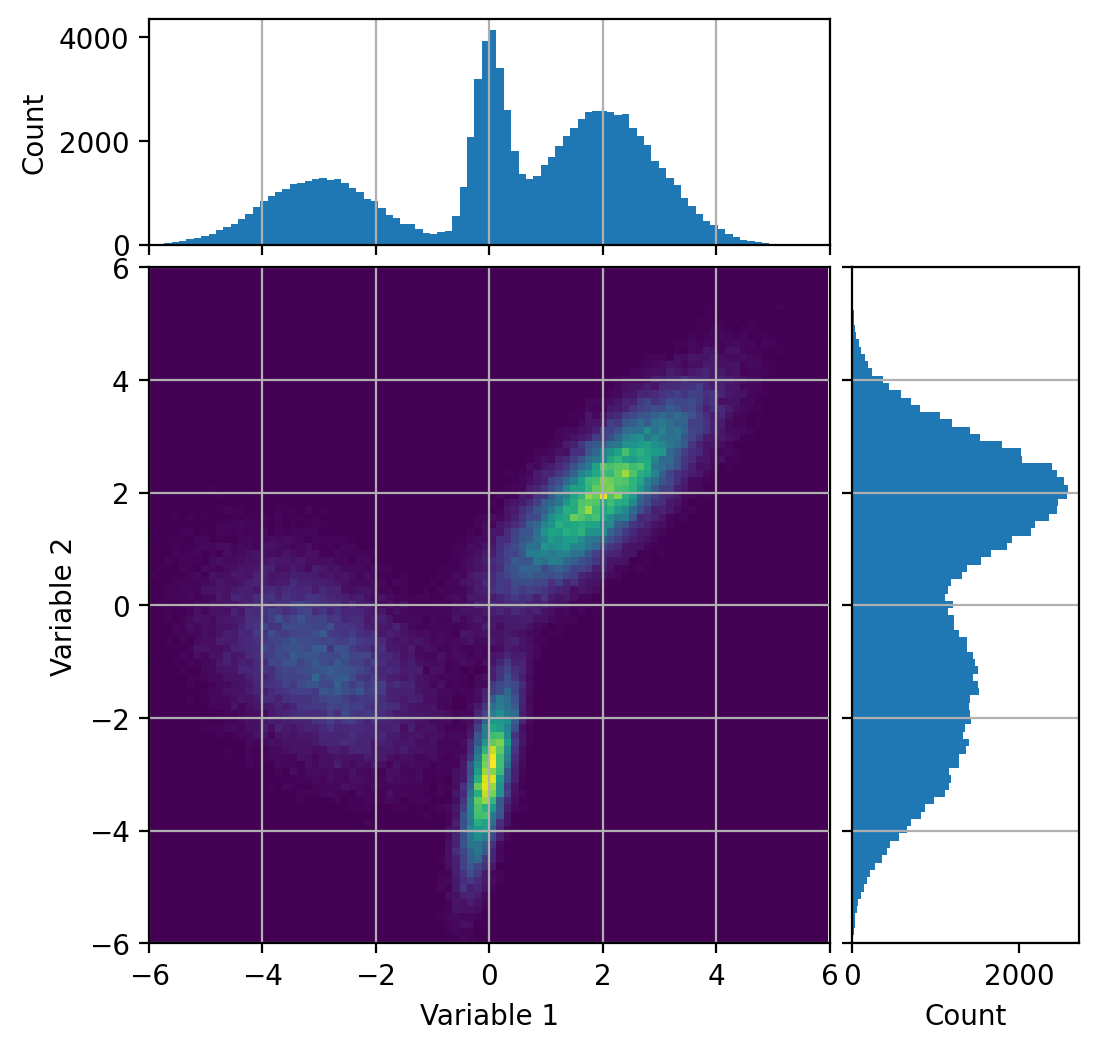

In [64]:
fig,[[ax1,ax_none],[ax2D,ax2]]=plt.subplots(2,2,
                    figsize=(6,6),
                    width_ratios=[0.75,0.25],
                    height_ratios=[0.25,0.75])
fig.subplots_adjust(hspace=0.05, wspace=0.05)

limits = [-6,6]

# 2D histogram axis
ax2D.hist2d(data[:,0],data[:,1], bins=100)
ax2D.set_xlabel('Variable 1')
ax2D.set_ylabel('Variable 2')
ax2D.set_xlim(limits)
ax2D.set_ylim(limits)
ax2D.grid(visible=True)

# 1D Variable 1 hist
ax1.hist(data[:,0],bins=100)
ax1.set_xlim(limits)
ax1.set_ylabel('Count')
ax1.set_xticklabels([])
ax1.grid(visible=True, axis='x')

# 1D Variable 2 hist (which needs to be rotated 90 degrees)
ax2.hist(data[:,1],bins=100,orientation='horizontal') # `orientation` allows us to rotate the axis
ax2.set_ylim(limits)
ax2.set_xlabel('Count')
ax2.set_yticklabels([])
ax2.grid(visible=True, axis='y')

# The upper right plot will be left blank, so we can turn it off
ax_none.axis('off')

Two-dimensional histograms, as shown in the example above, reveal relationships that aren't always visible in one-dimensional histograms of individual variables. This is a common theme of data visualization - if we explore our data in new ways, we learn more about its properties and those insights can help with both understanding and more effective modeling of our data.

In this example, we explored scatter plots, 1 dimensional and 2 dimensional histograms, and ways in which we can use and customize subplots for our plotting goals.